# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We the data for years 2016-2020 in our binder folder under the filename `revised-seasonally-adjusted-indexes-2020.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [2]:
df_price_index <- read_excel('revised-seasonally-adjusted-indexes-2020.xlsx')

We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for the year 2020.

You'll need this months vector for several operations:

In [3]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `Year == 2020`, 
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Group by month and `TITLE` then summarize by finding the mean index for each group.
- And last, use `forcats` to set the levels for the month column (hint: `tct_relevel(name, months)`)

The first three rows of your table will look something like this:

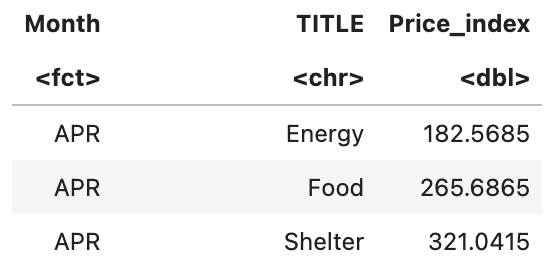

In [4]:
df_price_index_long <- df_price_index %>%
    filter(YEAR == 2020, 
           TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks'),
           DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'
          ) %>%
    pivot_longer(cols = all_of(months)) %>% 
    mutate(name = fct_relevel(name, months)) %>% 
    group_by(name, TITLE) %>% 
    summarize(Price_index = mean(value), .groups='drop')

head(df_price_index_long)

name,TITLE,Price_index
<fct>,<chr>,<dbl>
JAN,Energy,218.8980
JAN,Food,260.2200
JAN,Shelter,319.7095
JAN,Used cars and trucks,138.4230
FEB,Energy,213.6490
FEB,Food,261.0350


Ok! Now make this plot:

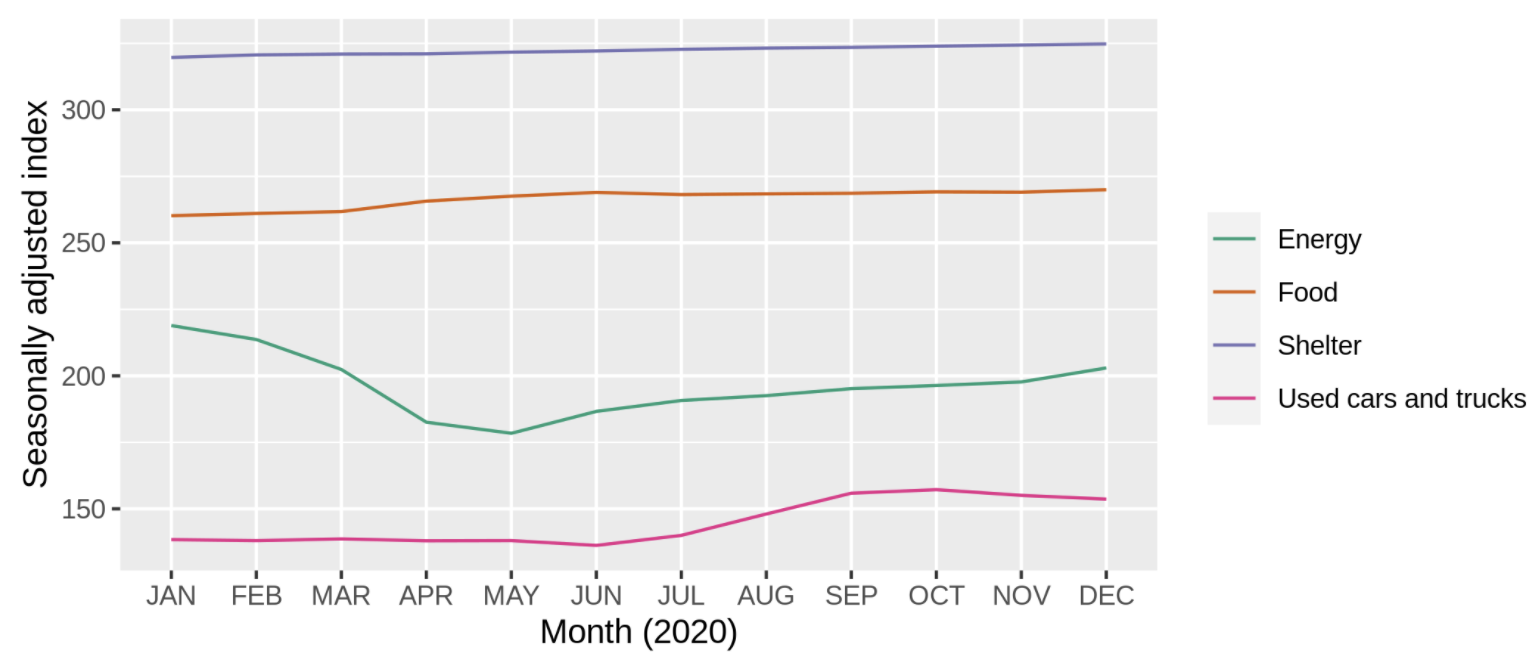

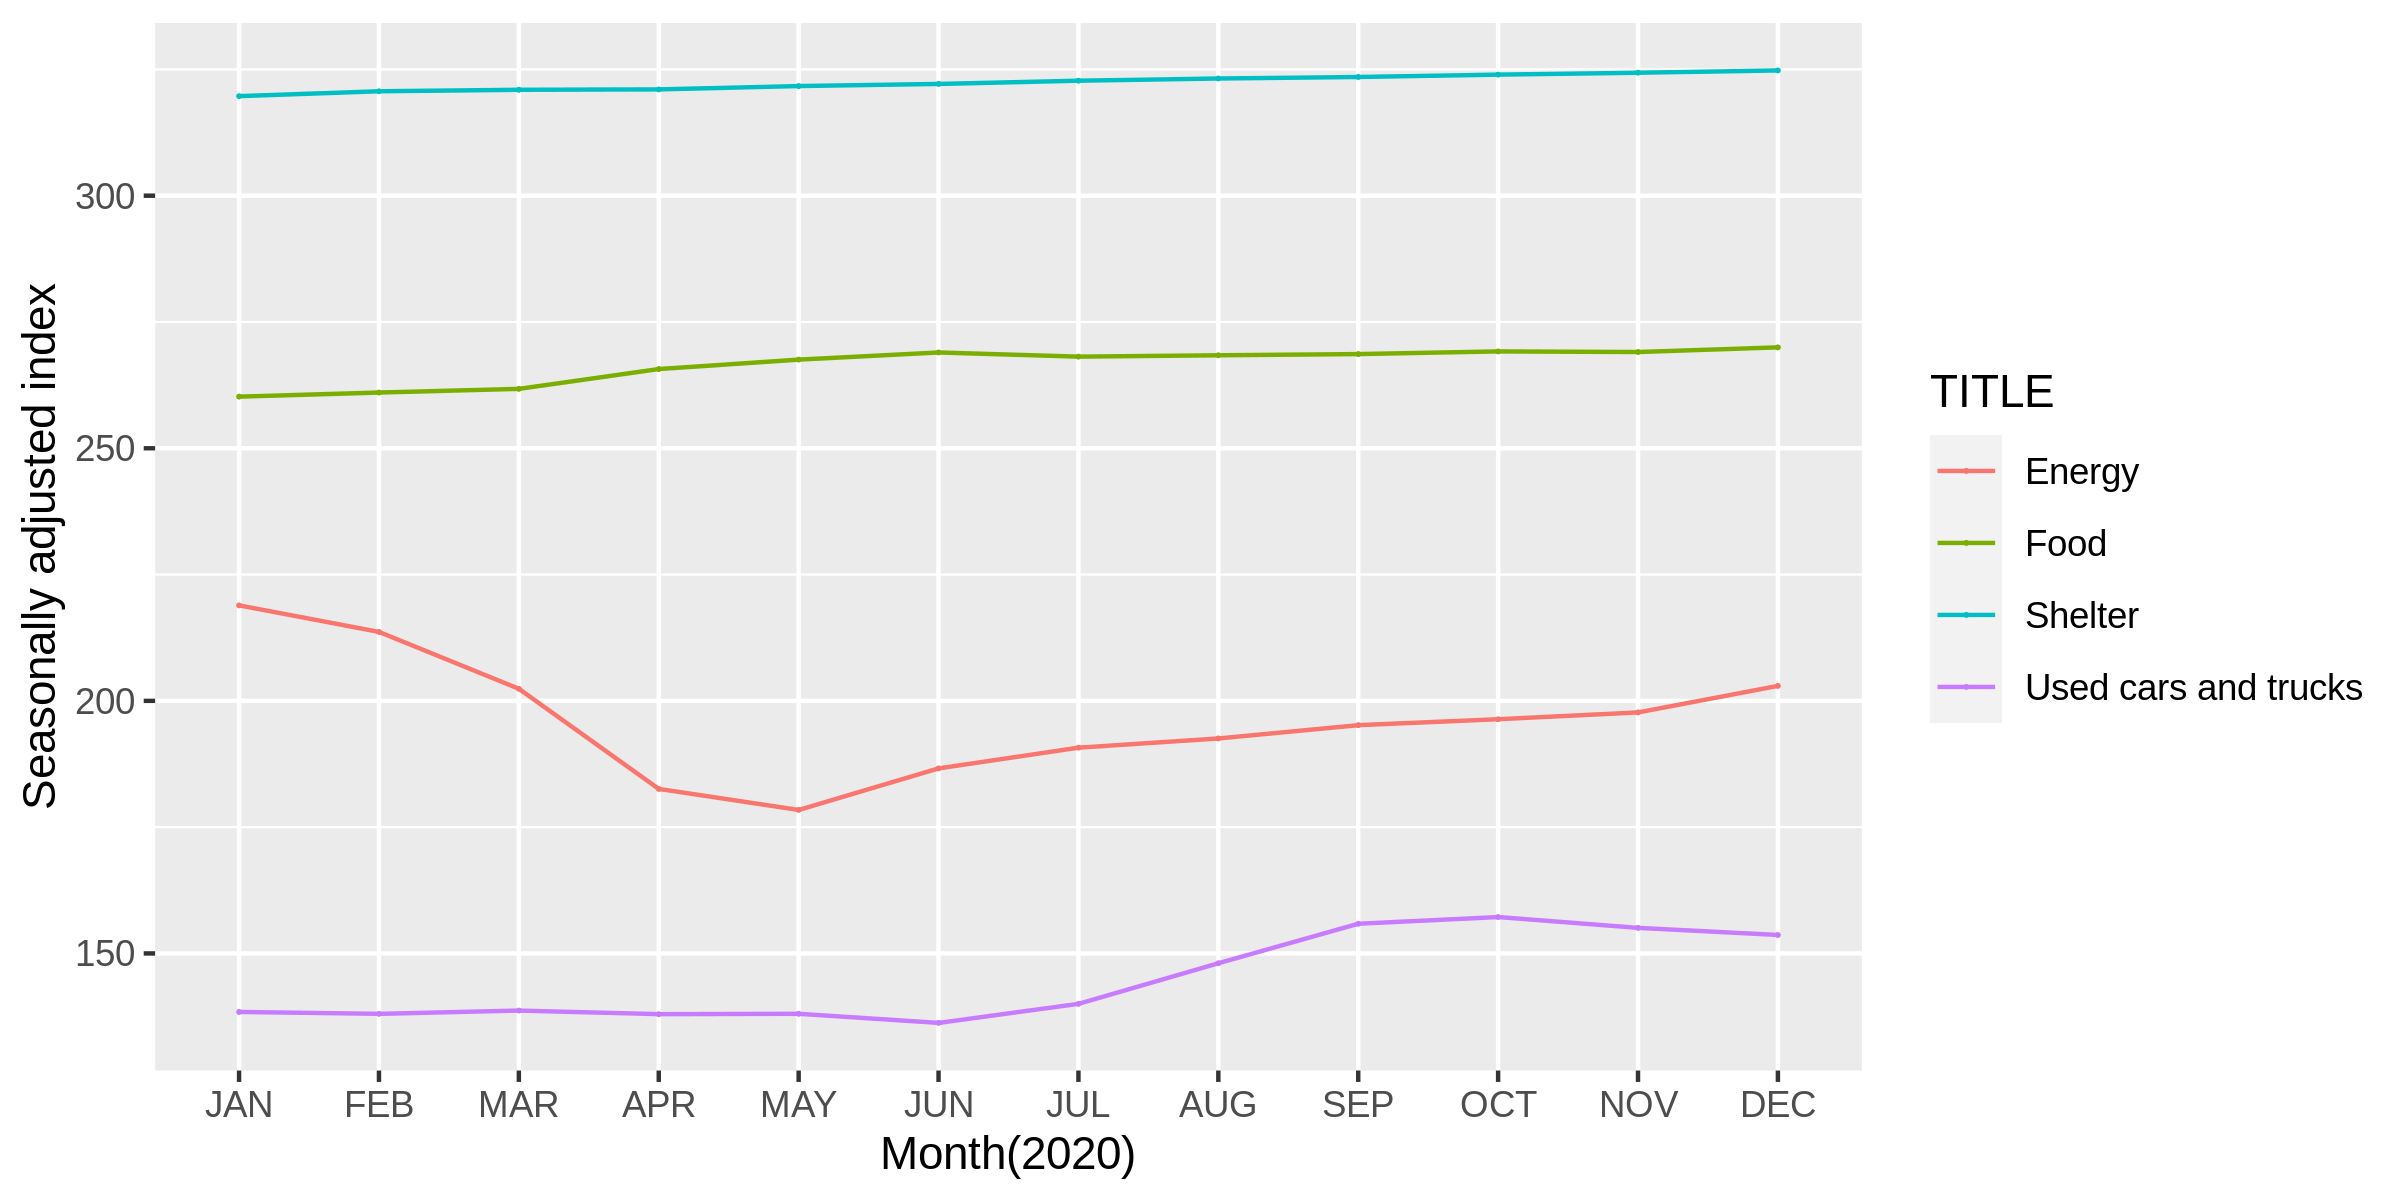

In [5]:
options(repr.plot.width = 8)

p <- ggplot(df_price_index_long, aes(x = name, y = Price_index, color = TITLE, group = TITLE))

p <- p + geom_point(size = 0) + geom_line()

p <- p + xlab("Month(2020)") + ylab("Seasonally adjusted index")

p

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.